In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime
from datetime import datetime

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

import math

import re
from collections import Counter

# Посмотрим на данные

In [3]:
df = pd.read_csv("games_clean.csv")

In [4]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [5]:
df.shape

(74200, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74200 entries, 0 to 74199
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       74200 non-null  int64  
 1   Name                        74198 non-null  object 
 2   Release date                74200 non-null  object 
 3   Estimated owners            74200 non-null  object 
 4   Peak CCU                    74200 non-null  int64  
 5   Required age                74200 non-null  int64  
 6   Price                       74200 non-null  float64
 7   DLC count                   74200 non-null  int64  
 8   About the game              74053 non-null  object 
 9   Supported languages         74200 non-null  object 
 10  Full audio languages        74200 non-null  object 
 11  Reviews                     9360 non-null   object 
 12  Header image                74200 non-null  object 
 13  Website                     366

## Описание признаков

`AppID`	- идентификатор приложения Steam  
`Name` - название игры  
`Release date` - дата выхода игры  
`Estimated owners` - количество пользователей, которые приобрели игру  
`Peak CCU` - пик количества пользователей (CCU) за вчерашний день  
`Required age` - требуемый возраст  
`Price` - текущая цена в USD  
`DLC count` - количество дополнений к игре  
`About the game` - описание игры  
`Supported languages` - список поддерживаемых языков  
`Full audio languages` - список поддерживаемых языков озвучивания  
`Reviews` - отзывы  
`Header image` - изображение заставки  
`Website` - сайт игры  
`Support url` - ссылка на поддержку для игры  
`Support email` - почта поддержки для игры  
`Windows` - доступна на Windows  
`Mac` - доступна на Mac  
`Linux` - доступна на Linux  
`Metacritic score` - оценка на Metacritic  
`Metacritic url` - ссылка на Metacritic  
`User score` - оценка пользователей  
`Positive` - количество позитивных отзывов  
`Negative` - количество негативных отзывов  
`Score rank` -  рейтинг игры на основе пользовательских отзывов  
`Achievements` - количество достижений в игре  
`Recommendations` - количество рекомендаций  
`Notes` - предупреждения об игре (например, предупреждение о наличии насилия в игре и непредназначенности ее для маленьких детей)  
`Average playtime forever` - среднее время игры с марта 2009 года. В минутах  
`Average playtime two weeks` - среднее время игры за последние две недели. В минутах  
`Median playtime forever` - медианное время игры с марта 2009 года. В минутах  
`Median playtime two weeks` -  медианное время игры за последние две недели. В минутах  
`Developers` - список разработчиков игры через запятую  
`Publishers` -  список издателей игры через запятую  
`Categories` - список категорий через запятую  
`Genres` - список жанров через запятую  
`Tags` - список тегов игры через запятую  
`Screenshots` - кадры игры  
`Movies` - видео игры

## Описательные статистики

In [7]:
# для категориальных переменных
df.describe(include=['object', 'bool'])

,Name,Release date,Estimated owners,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic url,Notes,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
count,74198,74200,74200,74053,74200,74200,9360,74200,36668,38210,64882,74200,74200,74200,3792,11501,74028,73766,73028,74051,59513,74127,71358
unique,73585,4297,14,73685,10276,2044,9263,74096,30095,25228,38304,2,2,2,3696,9340,45495,39409,5372,2265,52802,74023,71291
top,Shadow of the Tomb Raider: Definitive Edition,"Jul 14, 2023",0 - 20000,Help the beautiful girls to immerse themselves...,['English'],[],“The most ambitious in the modern trilogy” 9/1...,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.facebook.com/8FloorGames/,https://www.facebook.com/8FloorGames,info@bigfishgames.com,True,False,False,https://www.metacritic.com/game/pc/shadow-of-t...,This Game may contain content not appropriate ...,Choice of Games,Big Fish Games,Single-player,"Casual,Indie","Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
freq,20,94,50252,59,39950,41789,20,20,261,286,325,74173,59047,63781,20,103,149,480,21504,4397,293,20,20


In [8]:
# для вещественных переменных
df.describe(include=['int64','float64'], percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,7.420000e+04,74200.000000,74200.000000,74200.000000,74200.000000,74200.000000,74200.000000,7.420000e+04,74200.000000,42.000000,74200.000000,7.420000e+04,74200.000000,74200.000000,74200.000000,74200.000000
mean,1.242640e+06,144.868032,0.341402,7.463846,0.605323,3.720189,0.043464,1.079618e+03,176.566658,98.904762,21.546240,8.704377e+02,115.568329,11.690202,103.730485,12.528369
std,6.327827e+05,5730.092928,2.353833,11.213301,14.683253,16.205811,1.869194,2.607554e+04,4891.388116,0.878178,182.502244,1.914833e+04,1209.599853,200.975646,1613.810121,218.016612
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1%,3.427599e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5%,3.053895e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
10%,4.057560e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.157425e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.207855e+06,0.000000,0.000000,4.990000,0.000000,0.000000,0.000000,9.000000e+00,2.000000,99.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.755342e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.600000e+01,17.000000,100.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


**Нерелевантные признаки (можно удалить):**
- **User score, Score rank** - значения есть лишь для нескольких десятков игр
- **Average playtime two weeks,  Median playtime two weeks, Peak CCU** - устаревшие признаки
- **Header image, Website, Support url, Support email, Metacritic url, Screenshots, Movies** - ссылки/адреса

In [9]:
df = df.drop(columns=["User score", "Score rank", "Average playtime two weeks", "Median playtime two weeks", "Peak CCU",
                     "Header image", "Website", "Support url", "Support email", "Metacritic url", "Screenshots", "Movies"])

# Однофакторный анализ

In [10]:
def get_set_of_smth(smth):
    if 'nan' in str(smth).lower():
        return np.nan
    else:
        return set(str(smth).split(','))

def make_histplot(feature, data, x_label, rotation=False):
    sns.histplot(data[feature])
    if rotation:
        plt.xticks(rotation=90)
    plt.title(f'Распределение признака {feature}')
    plt.ylabel('Количество игр')
    plt.xlabel(x_label)
    plt.show()
    
def make_countplot(feature, data, x_label, order, rotation=False):
    sns.countplot(x = feature, data=data, order=order)
    if rotation:
        plt.xticks(rotation=90)
    plt.title(f'Распределение признака {feature}')
    plt.ylabel('Количество игр')
    plt.xlabel(x_label)
    plt.show()
    
def make_distplot(feature, data, x_label, rotation=False):
    sns.distplot(data[feature])
    if rotation == True:
        plt.xticks(rotation=90)
    plt.xlabel(x_label)
    plt.ylabel('Плотность')
    plt.title(f'Распределение признака {feature}')
    plt.show()
    
def make_barplot(feature, count, data, x_label, title, rotation=False):
    plt.bar(data[feature], data[count])
    if rotation == True:
        plt.xticks(rotation=90)
    plt.xlabel(x_label)
    plt.ylabel('Количество игр')
    plt.title(f'Количество игр по {title}')
    plt.show()

def countplot_many_features(data, feature, hue, order, rotation=False):
    sns.countplot(data=data, x=feature, hue=hue, order=order)
    if rotation == True:
        plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Количество игр')
    plt.title(f'Количество игр по {feature}')
    plt.show()

### Исправим формат даты в столбце Release_date

In [11]:
month_names = ["jan", "feb", 'mar', "apr", 
               "may", "jun", "jul", "aug", 
               "sep", "oct", "nov", "dec"]
month_nums = ["01", "02", "03", "04",
              "05", "06", "07", "08",
              "09", "10", "11", "12"]

def date_change_format(date):
    new_date = ""
    for month_name, month_num in zip(month_names, month_nums):
        if month_name in str(date).lower():
            new_date += month_num
            break
    new_date += ' '
    new_date += date[-4:]
    return datetime.strptime(new_date, '%m %Y')

In [12]:
df['Release_date'] = [date_change_format(date) for date in df['Release date']]

In [13]:
df[['Release date', 'Release_date']]

,Release date,Release_date
0,"Oct 21, 2008",2008-10-01
1,"Oct 12, 2017",2017-10-01
2,"Nov 17, 2021",2021-11-01
3,"Jul 23, 2020",2020-07-01
4,"Feb 3, 2020",2020-02-01
...,...,...
74195,"Aug 3, 2023",2023-08-01
74196,"Aug 1, 2023",2023-08-01
74197,"Aug 3, 2023",2023-08-01
74198,"Aug 4, 2023",2023-08-01


### График распределения Release_date

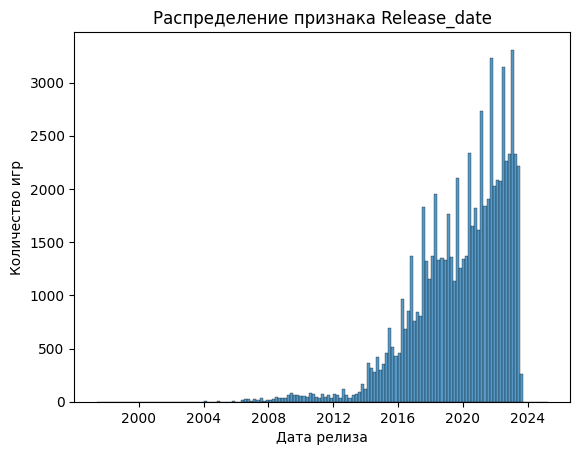

In [14]:
make_histplot('Release_date', df, 'Дата релиза')

**В основном в выборке представлены игры, выпущенные после 2014 года**

### Estimated owners

In [15]:
df["Estimated owners"].value_counts()

Estimated owners
0 - 20000                50252
20000 - 50000             7411
0 - 0                     6477
50000 - 100000            3687
100000 - 200000           2464
200000 - 500000           2058
500000 - 1000000           880
1000000 - 2000000          503
2000000 - 5000000          319
5000000 - 10000000          85
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64

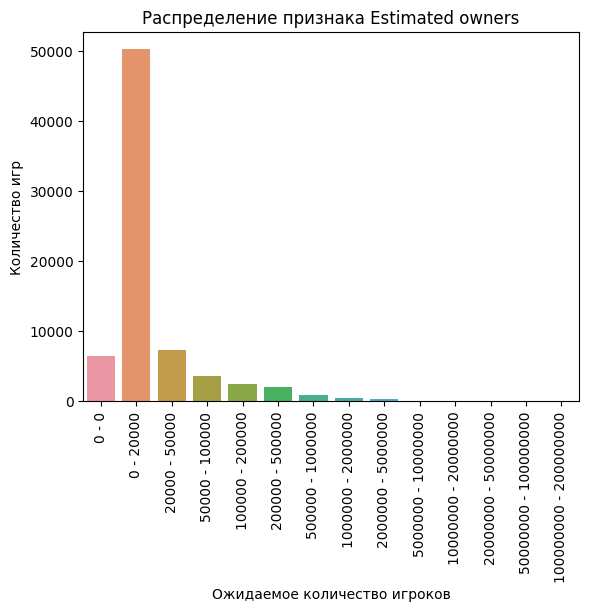

In [16]:
order=('0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000',
       '100000 - 200000', '200000 - 500000', '500000 - 1000000',
       '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000',
       '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000',
       '100000000 - 200000000')

make_countplot('Estimated owners', df, 'Ожидаемое количество игроков', order, rotation=True)

**В основном в выборке представлены непопулярные игры с небольшим количеством игроков**

### Required age

In [17]:
df["Required age"].value_counts()

Required age
0     72639
17      873
18      318
13      193
16       67
10       35
12       31
3         8
15        8
7         7
6         6
21        5
14        4
20        2
5         1
1         1
19        1
9         1
Name: count, dtype: int64

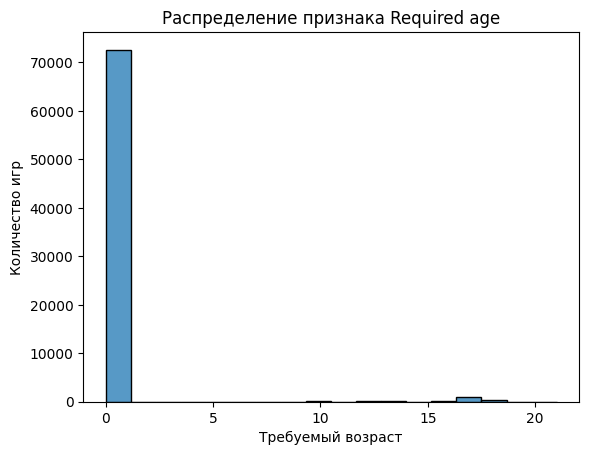

In [18]:
make_histplot('Required age', df, 'Требуемый возраст')

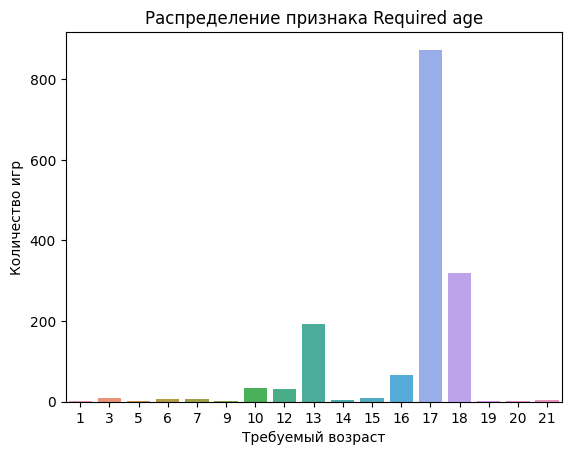

In [19]:
make_countplot('Required age', df[df["Required age"] != 0], 'Требуемый возраст', order=sorted(df["Required age"].unique())[1:])

**Большинство игр с ограничением по возрасту имеет ограничение в 17/18 лет.**

### Price

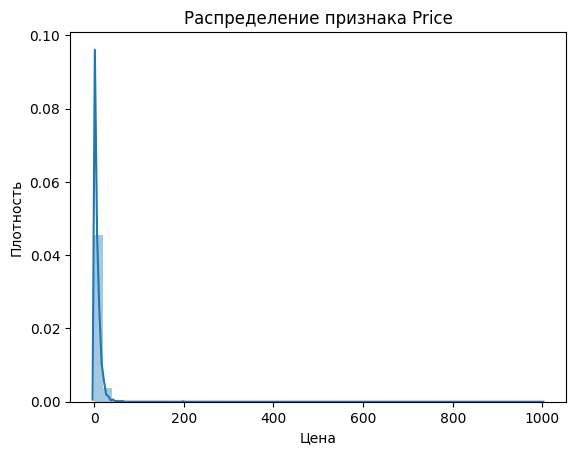

In [20]:
make_distplot('Price', df, 'Цена')

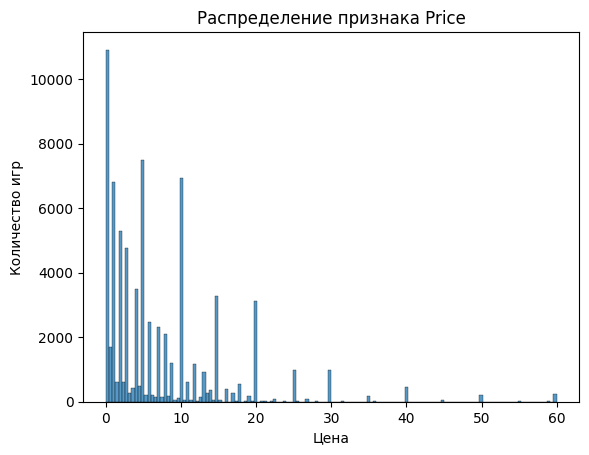

In [21]:
make_histplot('Price', df.loc[(df["Price"] < 60)], 'Цена')

**Явно видим группы игр по стоимости:**
- бесплатные
- около 5 долларов
- около 10 долларов
- около 15 долларов
- около 20 долларов
- около 25 долларов
- около 30 долларов
и т.д

In [22]:
def make_price_groups(price):
    for price_group in range(0, 80, 5):
        if float(price) == 0:
            return "Free"
        if price <= price_group:
            return "< " + str(price_group) + "$"
    
    return "> 80"

In [23]:
df["Price_Group"] = [make_price_groups(price) for price in df["Price"]]

In [24]:
df[["Price", "Price_Group"]]

,Price,Price_Group
0,19.99,< 20$
1,0.99,< 5$
2,4.99,< 5$
3,5.99,< 10$
4,0.00,Free
...,...,...
74195,0.99,< 5$
74196,4.99,< 5$
74197,11.04,< 15$
74198,3.99,< 5$


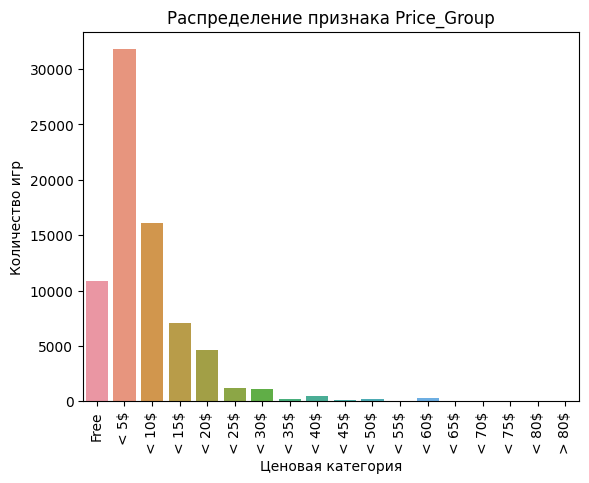

In [25]:
order = ('Free', '< 5$', '< 10$', '< 15$', '< 20$', '< 25$', '< 30$', '< 35$',
         '< 40$','< 45$', '< 50$', '< 55$', '< 60$',  '< 65$', '< 70$', '< 75$', '< 80$', '> 80$')

make_countplot('Price_Group', df, 'Ценовая категория', order, rotation=True)

**В основном в выборке представлены недорогие игры до 15 долларов**

### DLC count
дополнительный платный внутриигровой контент

In [26]:
df['DLC count'].value_counts()

DLC count
0       62941
1        7213
2        1778
3         680
4         379
        ...  
87          1
114         1
149         1
260         1
1968        1
Name: count, Length: 94, dtype: int64

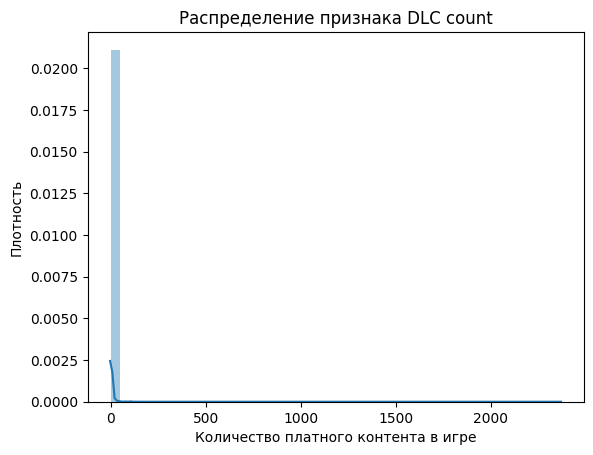

In [27]:
make_distplot('DLC count', df, 'Количество платного контента в игре')

**Для большинства игр дополнительного платного контента нет. Посмотрим отдельно на график распределения для игр, где есть платный контент:**

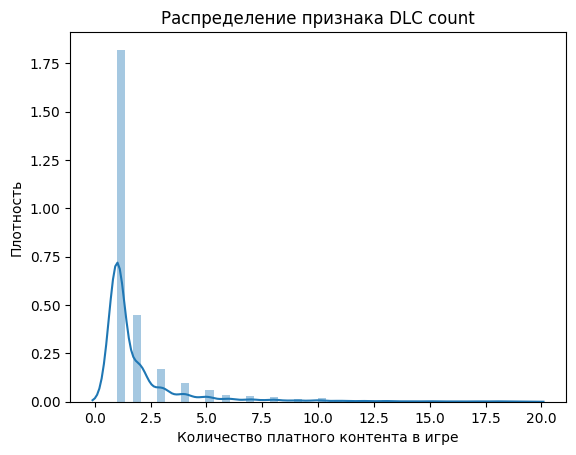

In [28]:
make_distplot('DLC count', df[(df['DLC count'] > 0) & (df['DLC count'] < 20)], 'Количество платного контента в игре')

### Supported languages

In [29]:
df['Supported languages']

0                                              ['English']
1        ['English', 'French', 'Italian', 'German', 'Sp...
2                       ['English', 'Portuguese - Brazil']
3        ['English', 'French', 'Italian', 'German', 'Sp...
4                           ['English', 'Spanish - Spain']
                               ...                        
74195                                          ['English']
74196                                          ['English']
74197    ['English', 'French', 'Italian', 'German', 'Sp...
74198                                          ['English']
74199                              ['Traditional Chinese']
Name: Supported languages, Length: 74200, dtype: object

In [30]:
df['Num Supported languages'] = [len(list(i)) for i in df['Supported languages']]

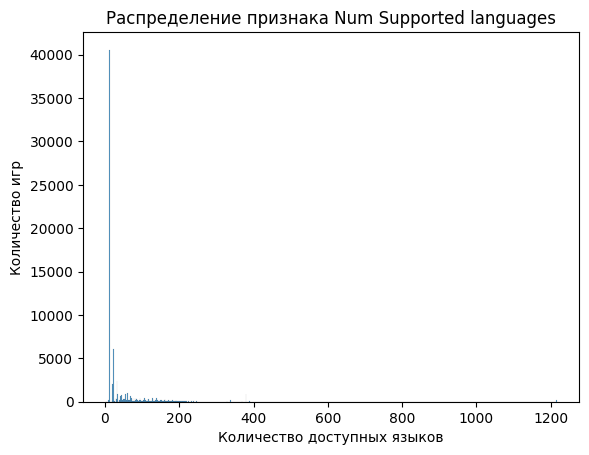

In [31]:
make_histplot('Num Supported languages', df, 'Количество доступных языков')

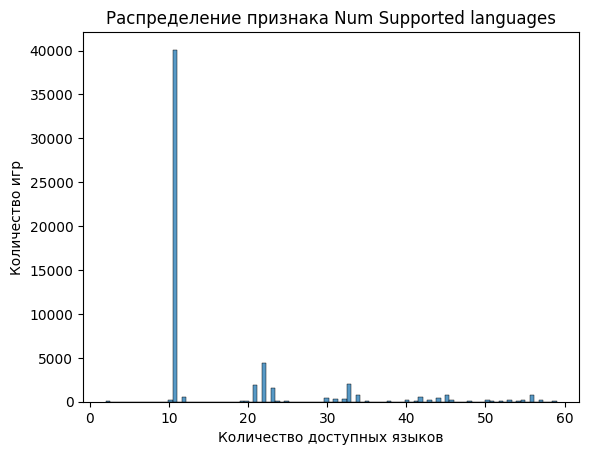

In [32]:
make_histplot('Num Supported languages', 
              df[df['Num Supported languages'] < 60], 
              'Количество доступных языков')

**В основном перевод игры доступен на примерно 10 языках**

In [33]:
def make_set(feature, new_feature, df):
    df[new_feature] = [get_set_of_smth(i) for i in df[feature]]

    all_text = list()
    for i in df[feature]:
        if 'nan' not in str(i).lower():
            new_text_list = re.sub('[^a-z0-9,]', '', str(i).lower()).split(',')
            all_text.extend(new_text_list)

    dict_text = Counter(all_text)

    sorted_text = sorted(dict_text.items(), key=lambda item: item[1], reverse=True)
    sorted_text_df = pd.DataFrame(sorted_text[0:10], columns=[feature, 'Count'])
    
    return df, sorted_text_df

In [34]:
df, sorted_text_lang_df = make_set('Supported languages', 'text_languages_set', df)

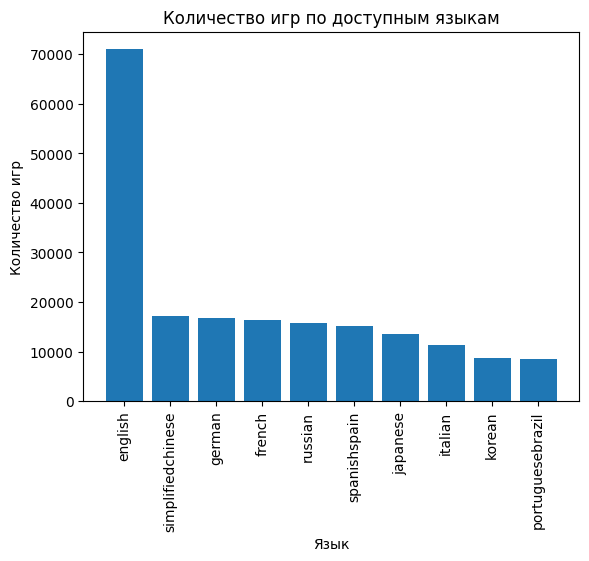

In [35]:
make_barplot('Supported languages', 'Count', sorted_text_lang_df, 
             'Язык', 'доступным языкам', rotation=True)

### Full audio languages

In [36]:
df['Num Full audio languages'] = [len(list(i)) for i in df['Full audio languages']]

In [37]:
df['Num Full audio languages']

0         2
1         2
2         2
3         2
4         2
         ..
74195     2
74196    11
74197     2
74198    11
74199     2
Name: Num Full audio languages, Length: 74200, dtype: int64

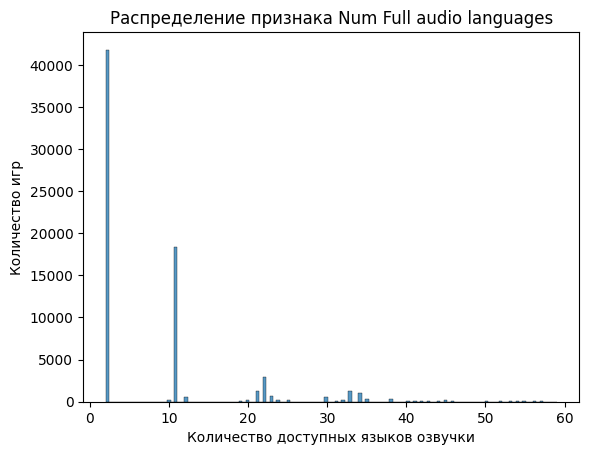

In [38]:
make_histplot('Num Full audio languages', df[df['Num Full audio languages'] < 60], 
              'Количество доступных языков озвучки')

**В основном игры поддерживают озвучку на двух-трех языках**

In [39]:
df, sorted_audio_lang_df = make_set('Full audio languages', 'audio_languages_set', df)

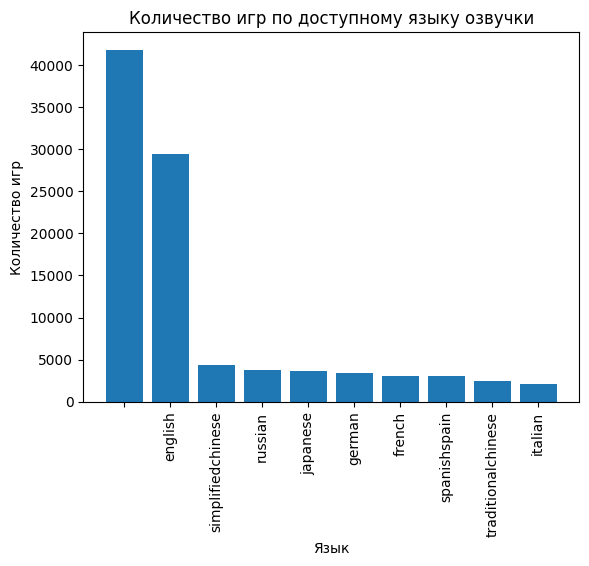

In [40]:
make_barplot('Full audio languages', 'Count', sorted_audio_lang_df, 
             'Язык', 'доступному языку озвучки', rotation=True)

**Как текст, так и озвучка игр в основном на английском языке**

### Windows, Mac, Linux

In [41]:
print("Количество доступных игр для")
for i in ['Windows', 'Mac', 'Linux']:
    print(f"{i}: {df[i].sum()}")

Количество доступных игр для
Windows: 74173
Mac: 15153
Linux: 10419


**Видим, что в основном игры выпускаются для windows**

### Metacritic score

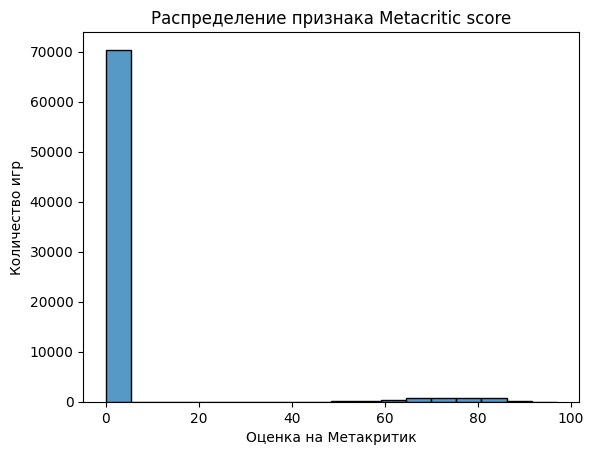

In [42]:
make_histplot('Metacritic score', df, 'Оценка на Метакритик')

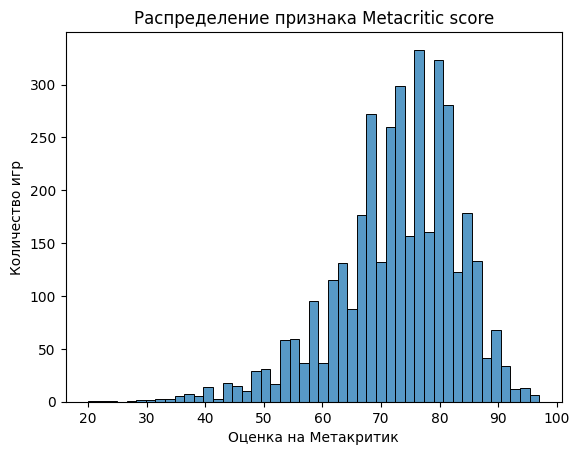

In [43]:
make_histplot('Metacritic score', df[df['Metacritic score'] != 0], 'Оценка на Метакритик')

**Данные об оценке на метакритик есть по небольшой части игр. Однако для тех игр, у которых есть оценка, наиболее часто стоит около 65-85** 

### Positive, Negative

In [44]:
for feature, rus_name in zip(['Positive', 'Negative'], ['позитивных', 'негативных']):
    print(f"Количество {rus_name} отзывов: {df[feature].sum()}")

Количество позитивных отзывов: 80107620
Количество негативных отзывов: 13101246


### Achievements

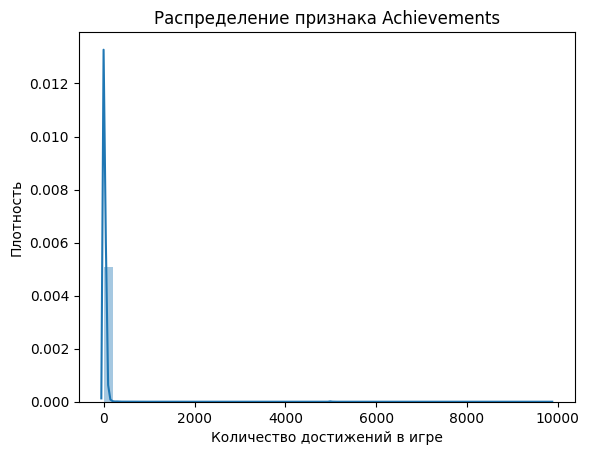

In [45]:
make_distplot('Achievements', df, 'Количество достижений в игре')

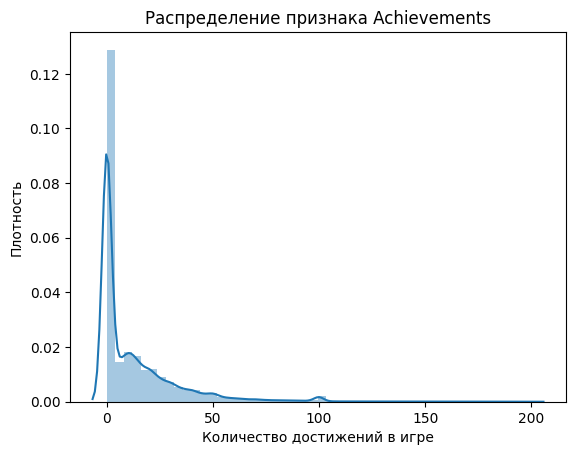

In [46]:
make_distplot('Achievements', df[df['Achievements'] < 200], 'Количество достижений в игре')

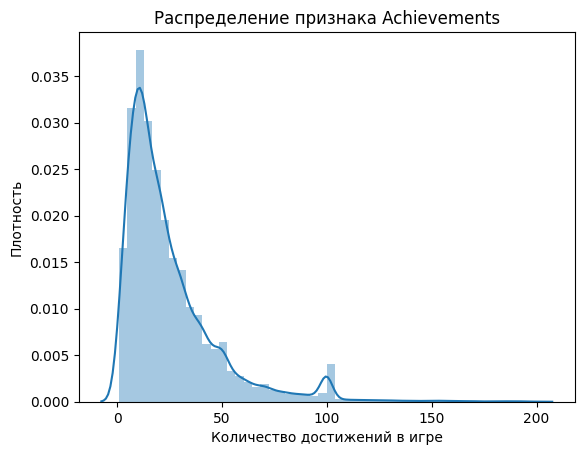

In [47]:
make_distplot('Achievements', df[(df['Achievements'] != 0) & (df['Achievements'] < 200)], 'Количество достижений в игре')

**У большей части игр с достижениями их немного (меньше 15)**

### Playtime

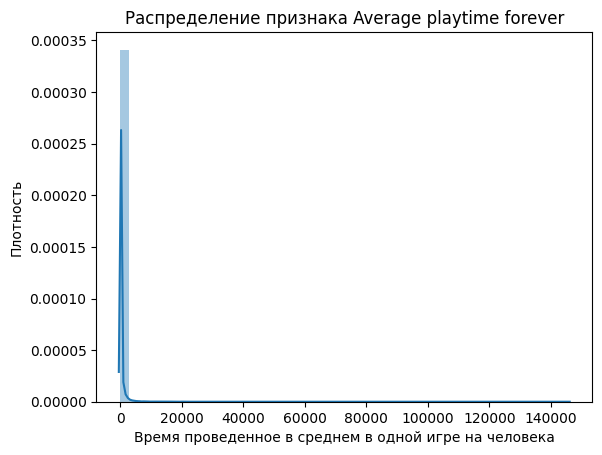

In [48]:
make_distplot('Average playtime forever', df, 'Время проведенное в среднем в одной игре на человека') 

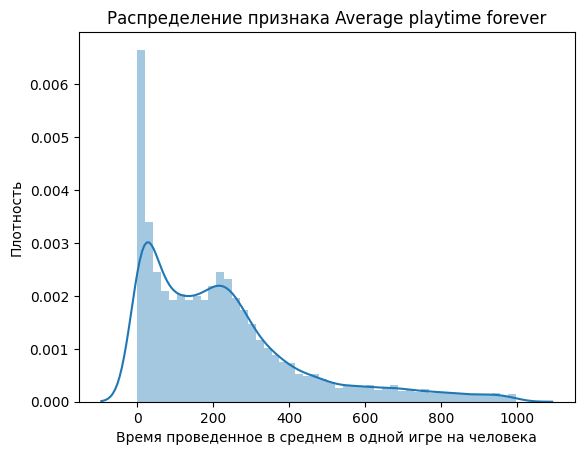

In [49]:
make_distplot('Average playtime forever', 
              df[(df['Average playtime forever'] != 0) & (df['Average playtime forever'] < 1000)], 
              'Время проведенное в среднем в одной игре на человека') 

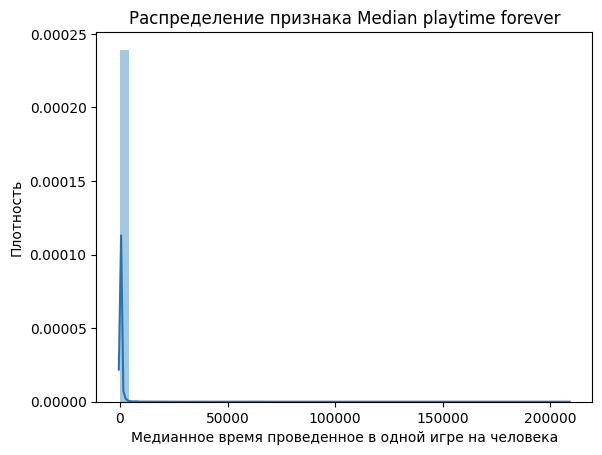

In [50]:
make_distplot('Median playtime forever', df, 'Медианное время проведенное в одной игре на человека')

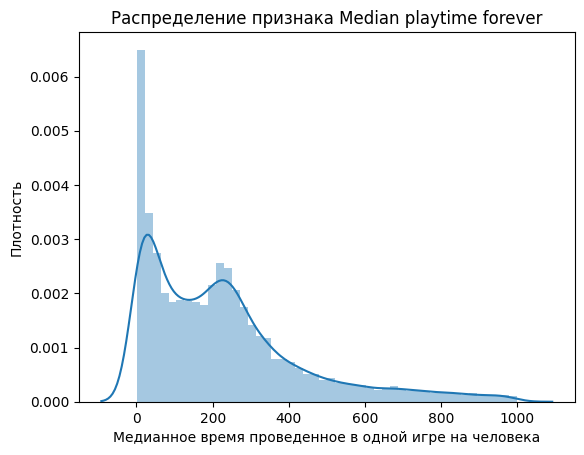

In [51]:
make_distplot('Median playtime forever', 
              df[(df['Median playtime forever'] != 0) & (df['Median playtime forever'] < 1000)], 
              'Медианное время проведенное в одной игре на человека') 

### Notes

In [52]:
sex_words = ['sex', 'erotic', 'nake', 'nud', 'underwear', 'butt', 
             'cloth', 'fetish', 'girl', 'kiss', 'masturb', 'femal']
violence_words = ['violen', 'blood', 'shoot', 'kill', 'abus', 
                  'gore', 'weapons', 'destr', 'monster', 'fight']
mature_words = ['matur', 'mild', 'shock', 'all ages', 'child', 'nsfw', 'languag']
depression_words = ['suicid', 'depression', 'addiction', 'smok', 'alcoh']

sex_pattern = '(?:{})'.format('|'.join(sex_words))
violence_pattern = '(?:{})'.format('|'.join(violence_words))
mature_pattern = '(?:{})'.format('|'.join(mature_words))
depression_pattern = '(?:{})'.format('|'.join(depression_words))
none_pattern = '(?:{})'.format('|'.join(['none', 'nan']))
    
patterns = [none_pattern, sex_pattern, 
            violence_pattern, depression_pattern,
            mature_pattern]
game_types = ['all ages', 'sexual content', 'violent content',
              'depression/suicide content', 'mature content']
    
def get_notes_type(note):
    new_note = str(note).lower()
    
    for pattern, game_type in zip(patterns, game_types):
        if bool(re.search(pattern, new_note)):
            return game_type

In [53]:
df['Notes_type'] = [get_notes_type(note) for note in df['Notes']]

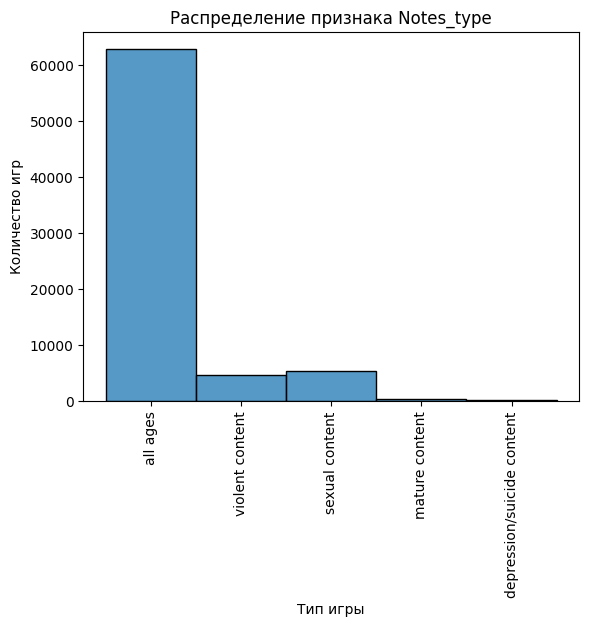

In [54]:
make_histplot('Notes_type', df, 'Тип игры', rotation=True)

**В основном представлены игры для всех возрастов**

### Developers

In [55]:
df['Developers'].value_counts()

Developers
Choice of Games             149
Creobit                     136
Laush Dmitriy Sergeevich    135
Boogygames Studios          107
Sokpop Collective           101
                           ... 
White Chamber                 1
EmpI Studios                  1
Thomukas1                     1
𝕲𝖗𝖆𝖓𝖉𝕸𝖎𝖓𝖎 𝕾𝖙𝖚𝖉𝖎𝖔𝖘 (ᚴᛘᛋ)       1
擱淺地 - Dream Antique           1
Name: count, Length: 45495, dtype: int64

### Publishers

In [56]:
df['Publishers'].value_counts()

Publishers
Big Fish Games                                         480
8floor                                                 255
SEGA                                                   172
Strategy First                                         164
HH-Games                                               162
                                                      ... 
ORANGE POPCORN                                           1
Coconut Island Games,Application Systems Heidelberg      1
Narrator,Mango Party,Lewd Formosa                        1
何劲秋                                                      1
擱淺地 - Dream Antique                                      1
Name: count, Length: 39409, dtype: int64

### Categories

In [57]:
df, sorted_categories_df = make_set('Categories', 'categories_set', df)

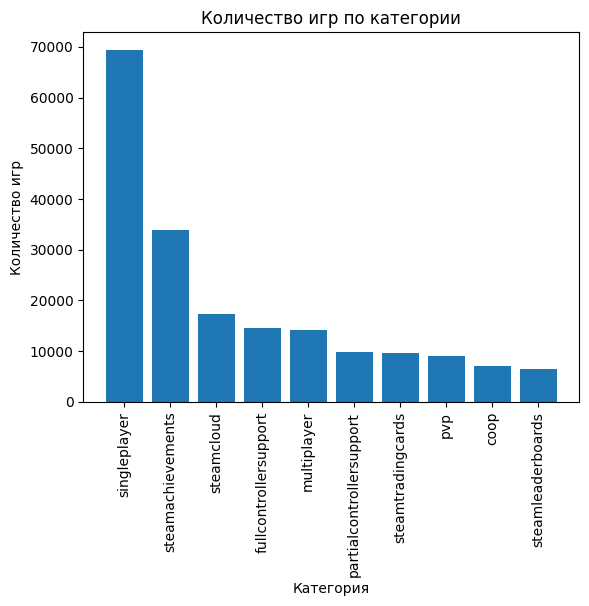

In [58]:
make_barplot('Categories', 'Count', sorted_categories_df, 
             'Категория', 'категории', rotation=True)

### Genres

In [59]:
df, sorted_genres_df = make_set('Genres', 'genres_set', df)

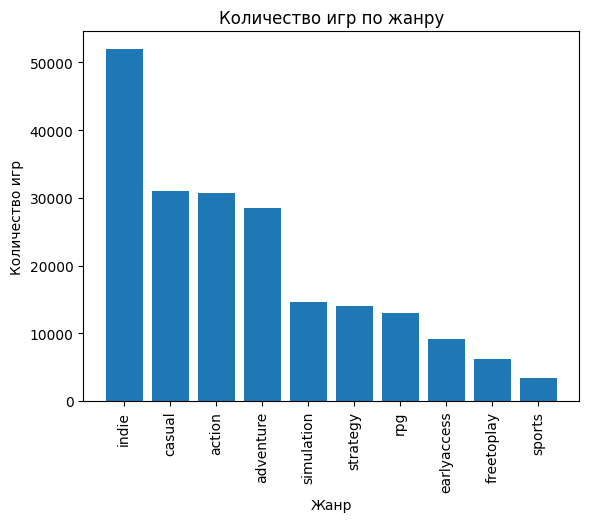

In [60]:
make_barplot('Genres', 'Count', sorted_genres_df, 
             'Жанр', 'жанру', rotation=True)

### Tags

In [61]:
df, sorted_tags_df = make_set('Tags', 'tags_set', df)

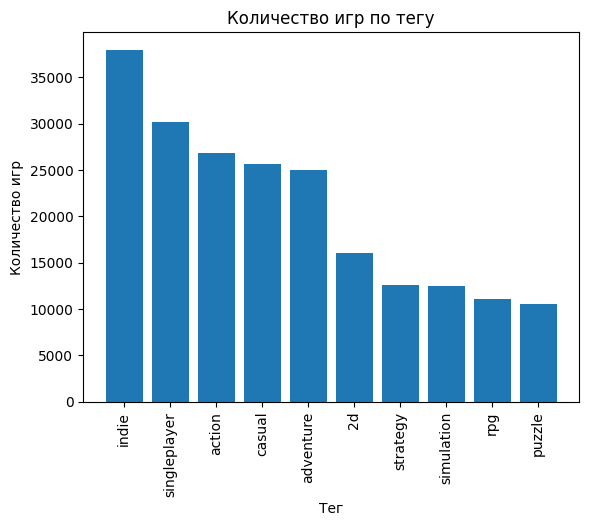

In [62]:
make_barplot('Tags', 'Count', sorted_tags_df, 
             'Тег', 'тегу', rotation=True)

**В основном в выборке представлены инди игры без мультиплеера**

# Многофакторный анализ

In [63]:
df['tag_indie'] = df['tags_set'].apply(lambda x: 'indie' in str(x).lower())

df['tag_singleplayer'] = df['tags_set'].apply(lambda x: 'singleplayer' in str(x).lower())
df['category_singleplayer'] = df['categories_set'].apply(lambda x: 'single-player' in str(x).lower())

df['genre_indie'] = df['genres_set'].apply(lambda x: 'indie' in str(x).lower())
df['genre_casual'] = df['genres_set'].apply(lambda x: 'casual' in str(x).lower())
df['genre_action'] = df['genres_set'].apply(lambda x: 'action' in str(x).lower())
df['genre_adventure'] = df['genres_set'].apply(lambda x: 'adventure' in str(x).lower())
df['genre_simulation'] = df['genres_set'].apply(lambda x: 'simulation' in str(x).lower())

In [64]:
df_estown_price = df[(df['Price_Group'].isin(['Free', '< 5$', '< 10$', '< 15$', 
                                              '< 20$', '< 25$'])) &
                      (df['Estimated owners'].isin(['0 - 0', '0 - 20000', '20000 - 50000',
                                                   '50000 - 100000', '100000 - 200000', '200000 - 500000']))]

## Estimated owners

In [65]:
order = ('0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000',
       '100000 - 200000', '200000 - 500000', '500000 - 1000000',
         '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000',
#       '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000',
#       '100000000 - 200000000'
        )


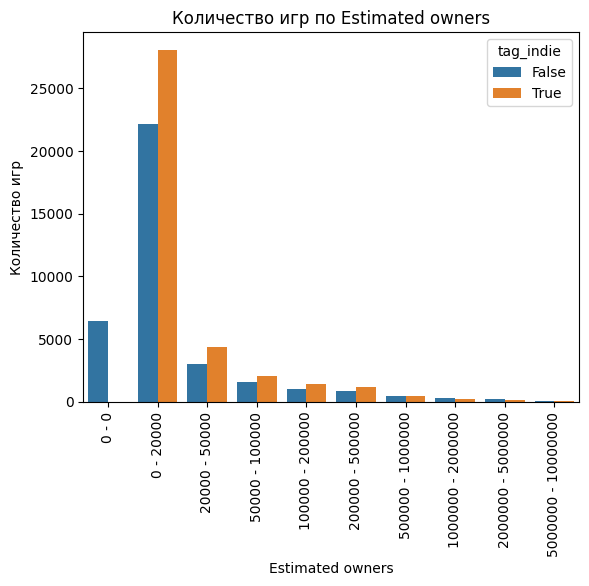

In [66]:
countplot_many_features(df, 'Estimated owners', 'tag_indie', order, rotation=True)

**Видим, что игры с ожидаемым очень маленьким количеством игроков реже относятся к категории инди**

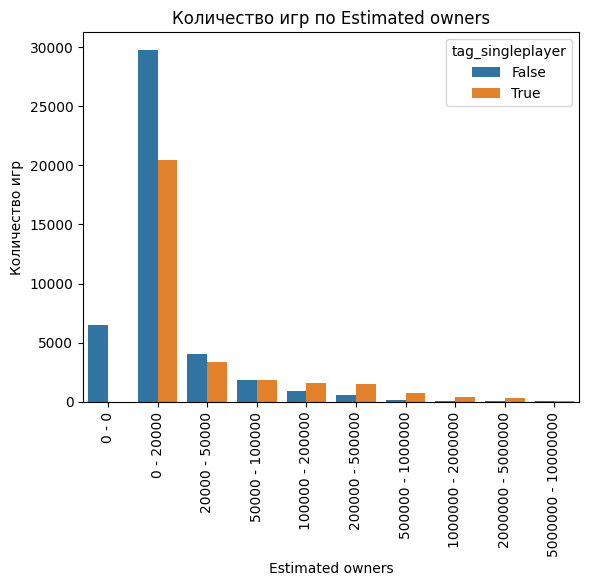

In [67]:
countplot_many_features(df, 'Estimated owners', 'tag_singleplayer', order, rotation=True)

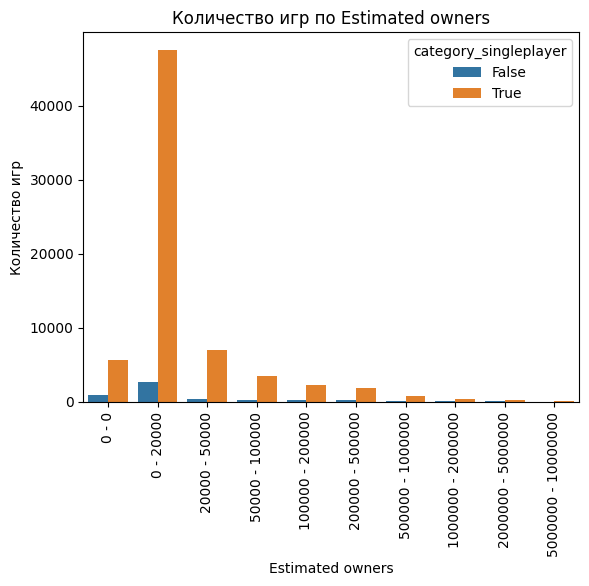

In [68]:
countplot_many_features(df, 'Estimated owners', 'category_singleplayer', order, rotation=True)

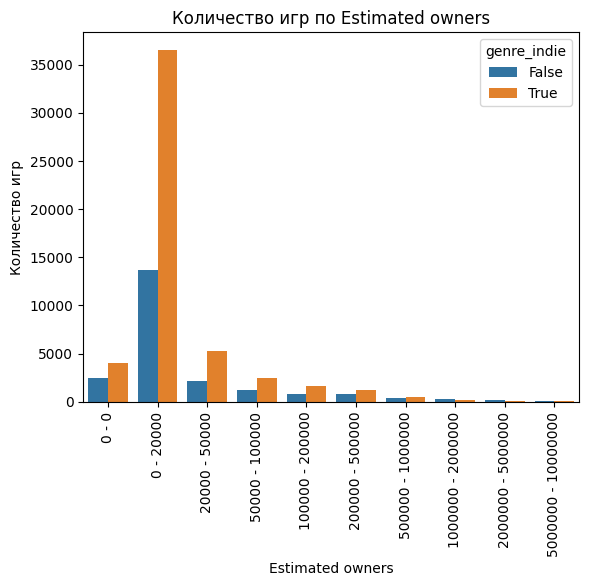

In [69]:
countplot_many_features(df, 'Estimated owners', 'genre_indie', order, rotation=True)

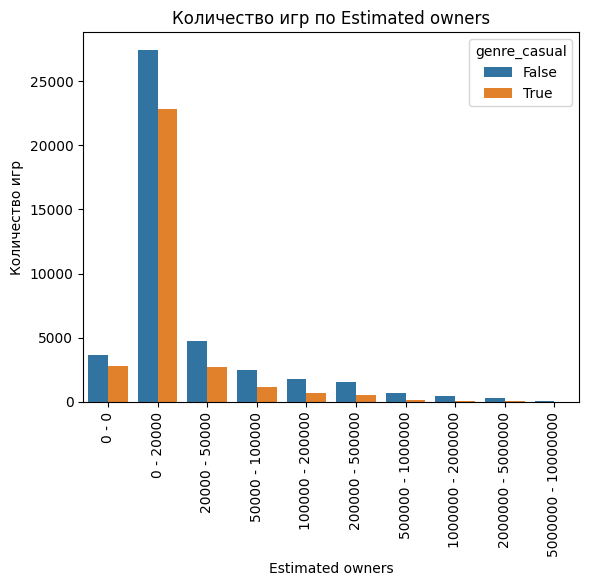

In [70]:
countplot_many_features(df, 'Estimated owners', 'genre_casual', order, rotation=True)

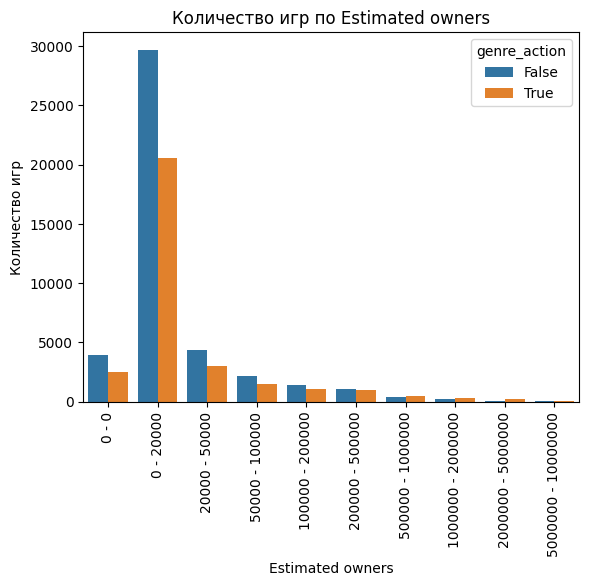

In [71]:
countplot_many_features(df, 'Estimated owners', 'genre_action', order, rotation=True)

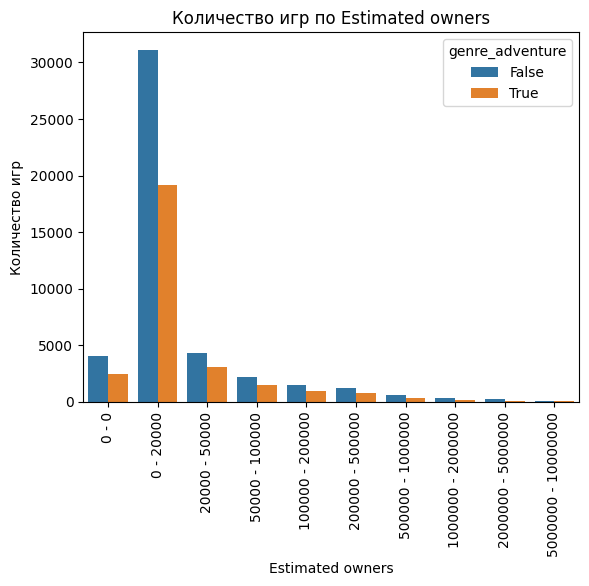

In [72]:
countplot_many_features(df, 'Estimated owners', 'genre_adventure', order, rotation=True)

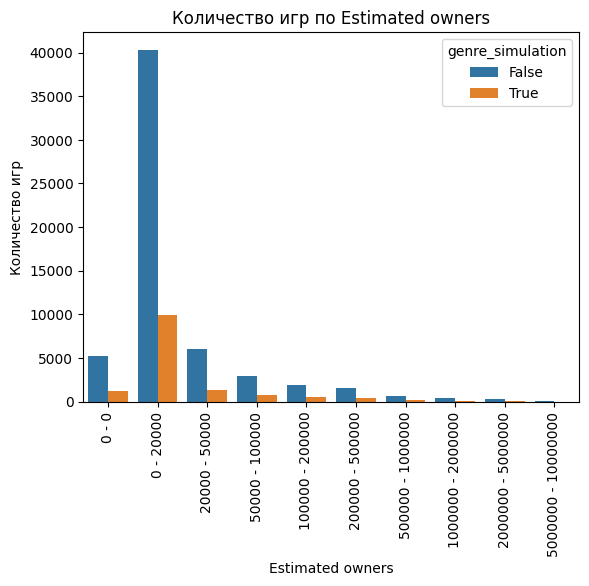

In [73]:
countplot_many_features(df, 'Estimated owners', 'genre_simulation', order, rotation=True)

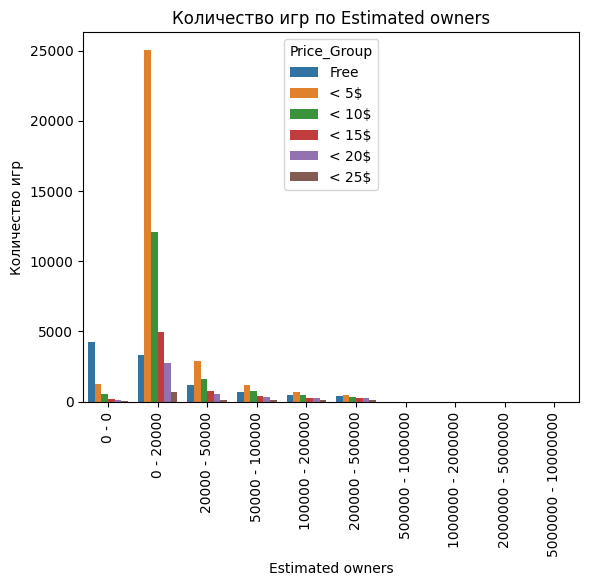

In [74]:
hue_order = ('Free', '< 5$', '< 10$', '< 15$', '< 20$', '< 25$')

feature = 'Estimated owners'
sns.countplot(data=df_estown_price, x=feature, hue='Price_Group', order=order, hue_order=hue_order)
plt.xticks(rotation=90)
plt.xlabel(feature)
plt.ylabel('Количество игр')
plt.title(f'Количество игр по {feature}')
plt.show()

**Видим, что для бесплатных игр ожидаемое количество игроков очень низкое**

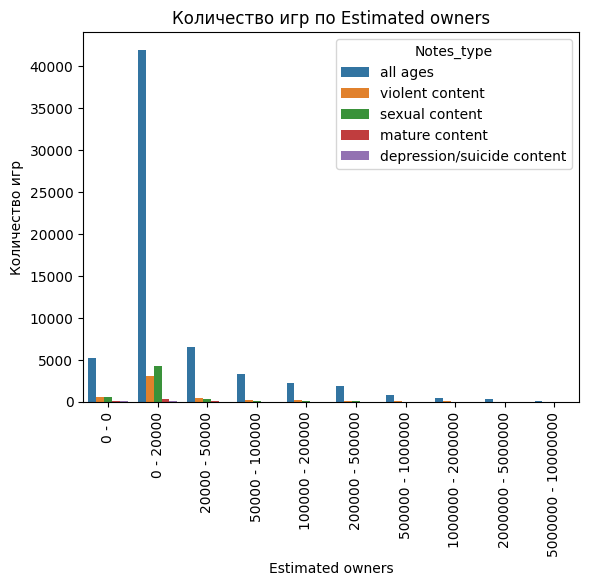

In [75]:
countplot_many_features(df, 'Estimated owners', 'Notes_type', order, rotation=True)

## Price group

In [76]:
order = ('Free', '< 5$', '< 10$', '< 15$', '< 20$', '< 25$', '< 30$', '< 35$',
         '< 40$')

In [77]:
df_price = df[df['Price_Group'].isin(['Free', '< 5$', '< 10$', '< 15$', '< 20$',
                                     '< 25$', '< 30$', '< 35$', '< 40$'])]

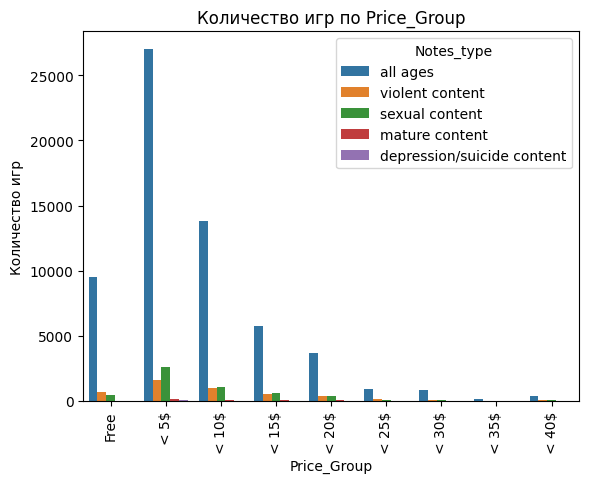

In [78]:
countplot_many_features(df_price, 'Price_Group', 'Notes_type', order, rotation=True)

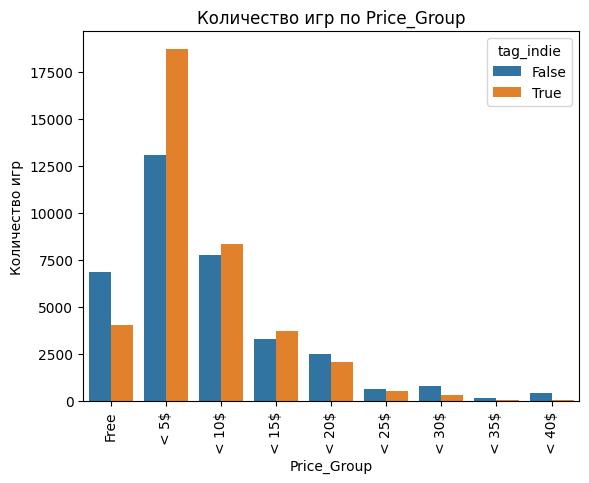

In [79]:
countplot_many_features(df_price, 'Price_Group', 'tag_indie', order, rotation=True)

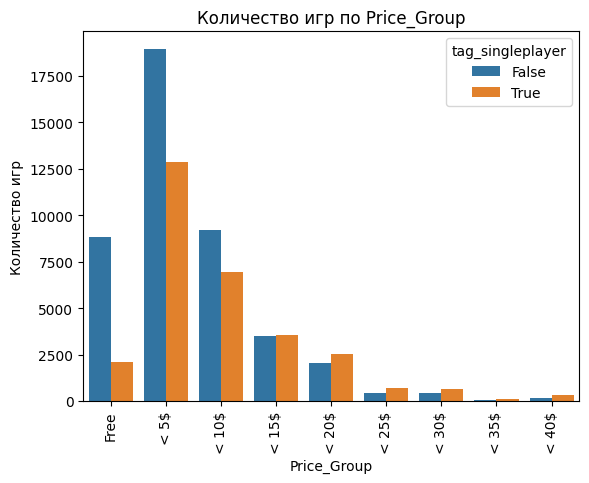

In [80]:
countplot_many_features(df_price, 'Price_Group', 'tag_singleplayer', order, rotation=True)

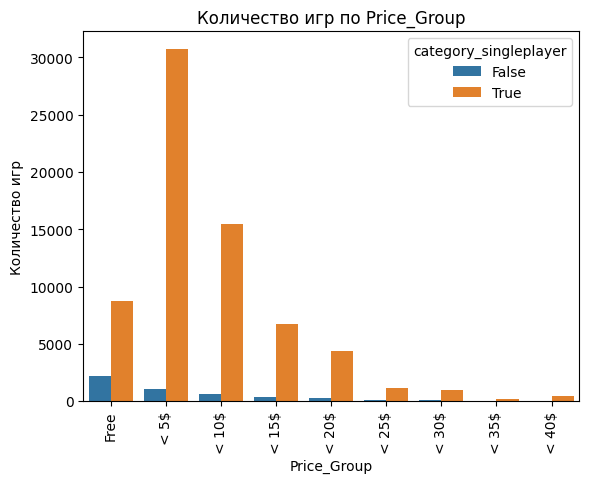

In [81]:
countplot_many_features(df_price, 'Price_Group', 'category_singleplayer', order, rotation=True)

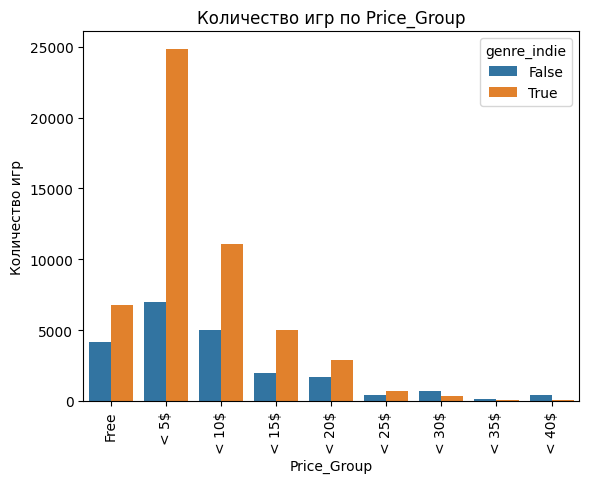

In [82]:
countplot_many_features(df_price, 'Price_Group', 'genre_indie', order, rotation=True)

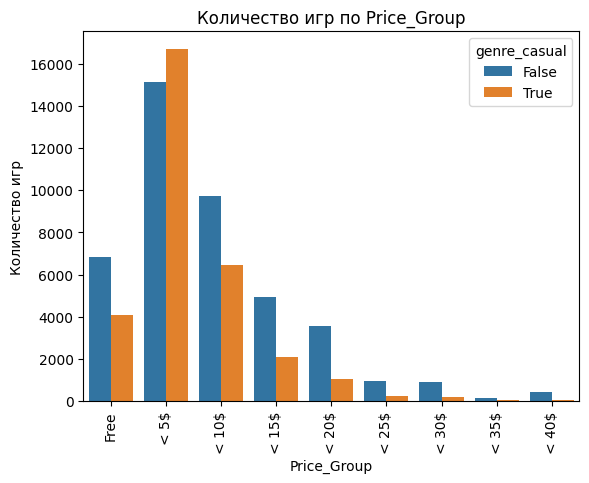

In [83]:
countplot_many_features(df_price, 'Price_Group', 'genre_casual', order, rotation=True)

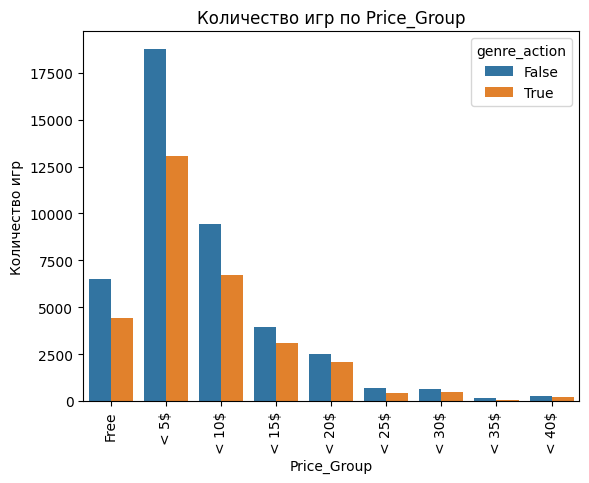

In [84]:
countplot_many_features(df_price, 'Price_Group', 'genre_action', order, rotation=True)

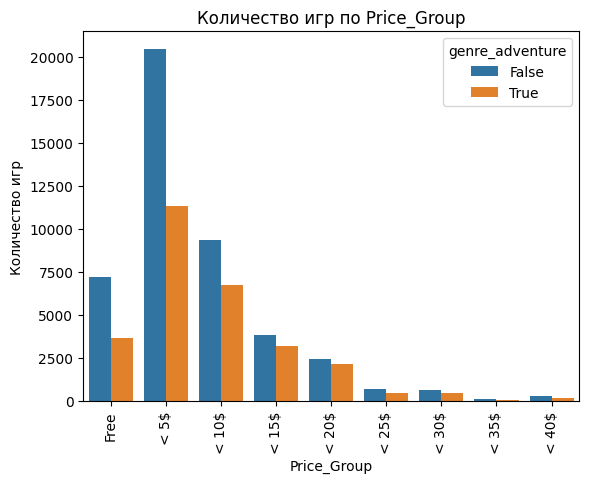

In [85]:
countplot_many_features(df_price, 'Price_Group', 'genre_adventure', order, rotation=True)

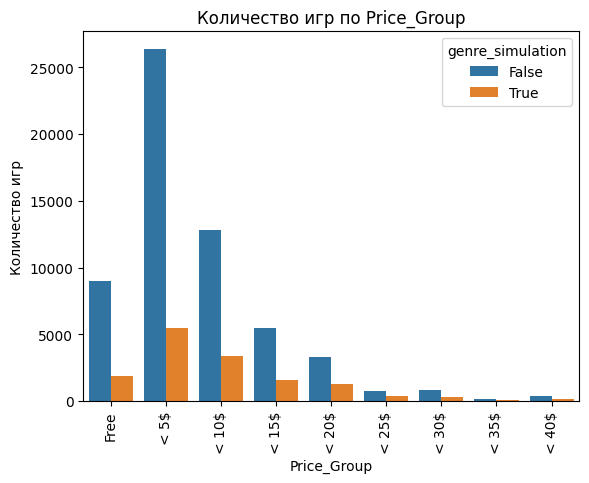

In [86]:
countplot_many_features(df_price, 'Price_Group', 'genre_simulation', order, rotation=True)

# Корреляционный анализ

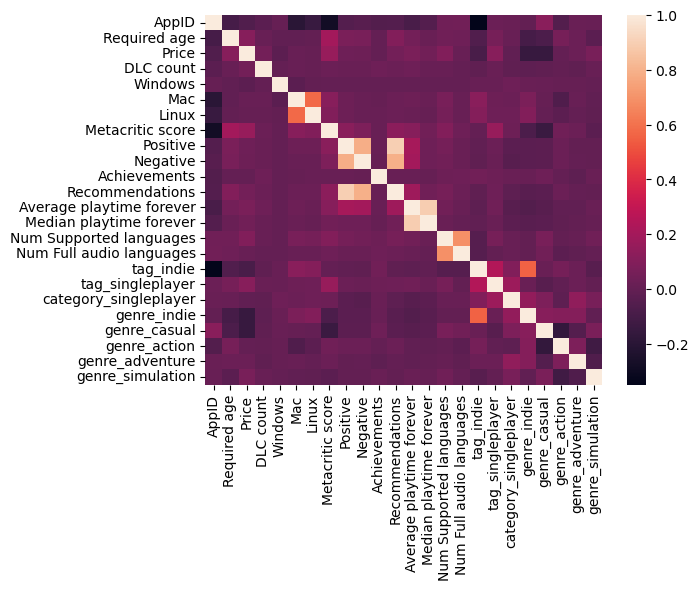

In [87]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

**Есть скоррелированные между собой признаки:**
- Score rank и Windows
- Num Supported languages и Num Full audio languages
- User score и Score rank
- Positive/Negative и Recommendations
- Average playtime (forever и two weeks)

### Построим графики скоррелированных признаков

In [87]:
def plot_correlated_features(feature1, feature2):
    plt.scatter(df[feature1], df[feature2])
    plt.title(f'Скоррелированные признаки \n{feature1} и {feature2}')
    plt.show()

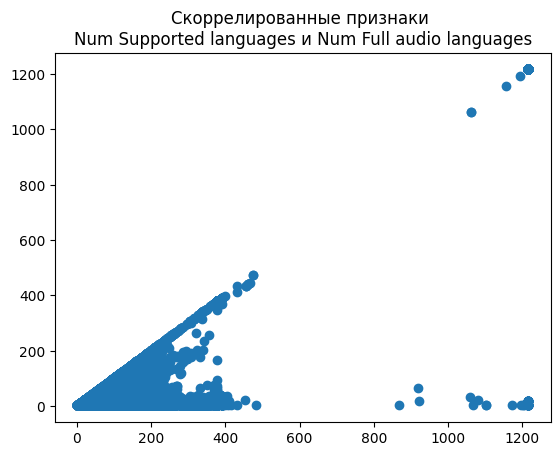

In [88]:
plot_correlated_features('Num Supported languages', 'Num Full audio languages')

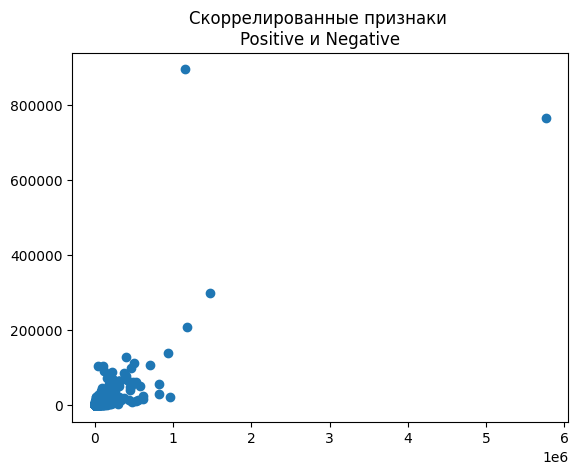

In [89]:
plot_correlated_features('Positive', 'Negative')

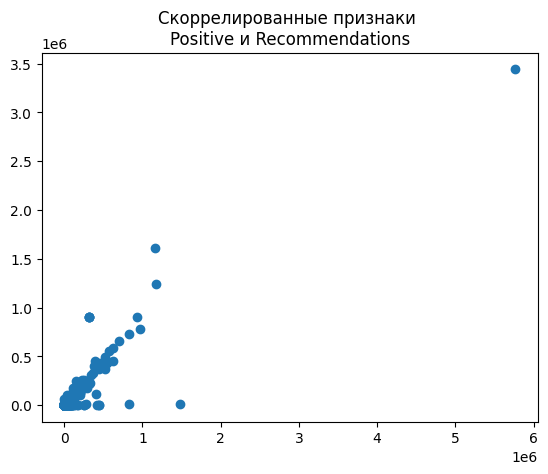

In [90]:
plot_correlated_features('Positive', 'Recommendations')

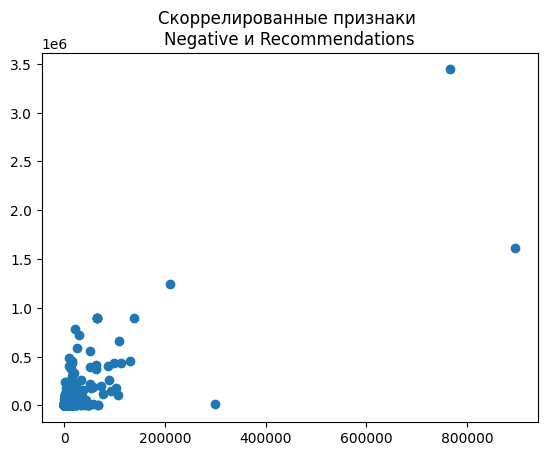

In [91]:
plot_correlated_features('Negative', 'Recommendations')

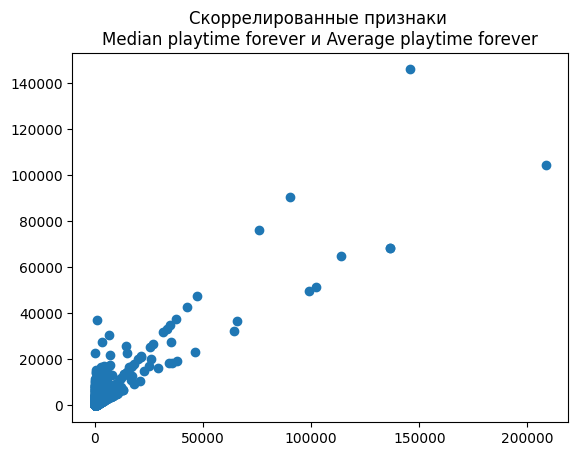

In [92]:
plot_correlated_features('Median playtime forever', 'Average playtime forever')

# Дополнительный анализ при фильтрации "треш" игр

In [93]:
df["TotalReviews"] = df["Positive"] + df["Negative"]

df_popular = df.query("TotalReviews >= 400")
df_popular = df_popular[~df["Estimated owners"].isin(["0 - 0", "0 - 20000"])]

In [94]:
df_popular.describe(include=['object'])

,Name,Release date,Estimated owners,About the game,Supported languages,Full audio languages,Reviews,Notes,Developers,Publishers,Categories,Genres,Tags,Price_Group,text_languages_set,audio_languages_set,Notes_type,categories_set,genres_set,tags_set
count,8144,8144,8144,8131,8144,8144,2792,966,8144,8091,8104,8135,8144,8144,8144,8144,8105,8104,8135,8144
unique,8121,3046,12,8095,3502,844,2784,832,5311,3796,2451,787,8131,16,2851,782,5,2450,780,8073
top,Sid Meier's Civilization IV: Colonization,"Jun 4, 2020",200000 - 500000,Deceived by the forces of evil into prematurel...,['English'],[],“Operation: Tango is a clever and appealing ta...,This Game may contain content not appropriate ...,"KOEI TECMO GAMES CO., LTD.",Square Enix,Single-player,Action,"Utilities,Software",< 10$,{['English']},{[]},all ages,{Single-player},{Action},"{Indie, Great Soundtrack, Mystery, Point & Cli..."
freq,2,16,1823,3,2176,3614,2,25,49,111,595,522,4,1544,2176,3614,7186,595,522,8


In [95]:
df.describe(include=['object'])

,Name,Release date,Estimated owners,About the game,Supported languages,Full audio languages,Reviews,Notes,Developers,Publishers,Categories,Genres,Tags,Price_Group,text_languages_set,audio_languages_set,Notes_type,categories_set,genres_set,tags_set
count,74198,74200,74200,74053,74200,74200,9360,11501,74028,73766,73028,74051,59513,74200,74200,74200,73504,73028,74051,59513
unique,73585,4297,14,73685,10276,2044,9263,9340,45495,39409,5372,2265,52802,17,7972,1851,5,5364,2244,50283
top,Shadow of the Tomb Raider: Definitive Edition,"Jul 14, 2023",0 - 20000,Help the beautiful girls to immerse themselves...,['English'],[],“The most ambitious in the modern trilogy” 9/1...,This Game may contain content not appropriate ...,Choice of Games,Big Fish Games,Single-player,"Casual,Indie","Indie,Casual",< 5$,{['English']},{[]},all ages,{Single-player},"{Indie, Casual}","{Indie, Casual}"
freq,20,94,50252,59,39950,41789,20,103,149,480,21504,4397,293,31799,39950,41789,62838,21504,4418,364


**Выводы:**
- Самым часто встречающимся был жанр Indie и Casual, после фильтрации стал Action
- Выросла наиболее частая ценовая группа - с < 5 USD до < 10 USD
- Изменились наиболее частые Developers и Publishers и существенно понизилось количество игр от них

In [96]:
df_popular.describe(include=['int64','float64'], percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,AppID,Required age,Price,DLC count,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,Num Supported languages,Num Full audio languages,TotalReviews
count,8.144000e+03,8144.000000,8144.000000,8144.000000,8144.000000,8.144000e+03,8144.000000,8144.000000,8.144000e+03,8144.000000,8144.000000,8144.000000,8144.000000,8.144000e+03
mean,6.603340e+05,1.535241,13.227025,3.066920,23.992387,9.319240e+03,1470.622544,42.902137,7.081115e+03,768.590128,620.312868,86.182220,24.881753,1.078986e+04
std,4.586354e+05,4.819802,13.034867,40.954194,35.342491,7.787648e+04,14624.781989,198.708273,5.368383e+04,2798.917682,3530.891354,76.281905,44.678789,8.976333e+04
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,6.200000e+01,4.000000,0.000000,0.000000e+00,0.000000,0.000000,10.000000,2.000000,4.000000e+02
1%,3.602900e+03,0.000000,0.000000,0.000000,0.000000,2.210000e+02,18.000000,0.000000,0.000000e+00,0.000000,0.000000,11.000000,2.000000,4.100000e+02
5%,3.313750e+04,0.000000,0.000000,0.000000,0.000000,3.240000e+02,41.000000,0.000000,0.000000e+00,0.000000,0.000000,11.000000,2.000000,4.490000e+02
10%,2.075540e+05,0.000000,0.000000,0.000000,0.000000,3.840000e+02,61.000000,0.000000,0.000000e+00,6.000000,6.000000,11.000000,2.000000,5.053000e+02
25%,3.035500e+05,0.000000,2.990000,0.000000,0.000000,5.650000e+02,116.000000,0.000000,4.057500e+02,100.000000,80.000000,11.000000,2.000000,7.167500e+02
50%,5.321500e+05,0.000000,9.990000,0.000000,0.000000,1.210500e+03,249.000000,21.000000,9.060000e+02,246.500000,219.000000,68.000000,11.000000,1.487500e+03
75%,9.968300e+05,0.000000,19.990000,1.000000,69.000000,3.679000e+03,657.250000,43.000000,2.824250e+03,620.000000,475.000000,138.000000,32.000000,4.432250e+03


In [97]:
df.describe(include=['int64','float64'], percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,AppID,Required age,Price,DLC count,Metacritic score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,Num Supported languages,Num Full audio languages,TotalReviews
count,7.420000e+04,74200.000000,74200.000000,74200.000000,74200.000000,7.420000e+04,74200.000000,74200.000000,7.420000e+04,74200.000000,74200.000000,74200.000000,74200.000000,7.420000e+04
mean,1.242640e+06,0.341402,7.463846,0.605323,3.720189,1.079618e+03,176.566658,21.546240,8.704377e+02,115.568329,103.730485,48.581914,16.373046,1.256184e+03
std,6.327827e+05,2.353833,11.213301,14.683253,16.205811,2.607554e+04,4891.388116,182.502244,1.914833e+04,1209.599853,1613.810121,93.072443,67.608325,3.006649e+04
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,2.000000,0.000000e+00
1%,3.427599e+04,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,11.000000,2.000000,0.000000e+00
5%,3.053895e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,11.000000,2.000000,0.000000e+00
10%,4.057560e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,11.000000,2.000000,0.000000e+00
25%,7.157425e+05,0.000000,0.990000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,11.000000,2.000000,1.000000e+00
50%,1.207855e+06,0.000000,4.990000,0.000000,0.000000,9.000000e+00,2.000000,2.000000,0.000000e+00,0.000000,0.000000,11.000000,2.000000,1.200000e+01
75%,1.755342e+06,0.000000,9.990000,0.000000,0.000000,5.600000e+01,17.000000,19.000000,0.000000e+00,0.000000,0.000000,48.000000,11.000000,7.700000e+01


**Выводы:**
- Price - cреднее значение цены увеличилось в два раза
- Metacritic Score - появилась бОльшая вариабельность признака, для 75 перцентиля стало значение 69
- Average/Median Playtime Forever - признаки были невариабельные, после фильтрации стали вариабельными

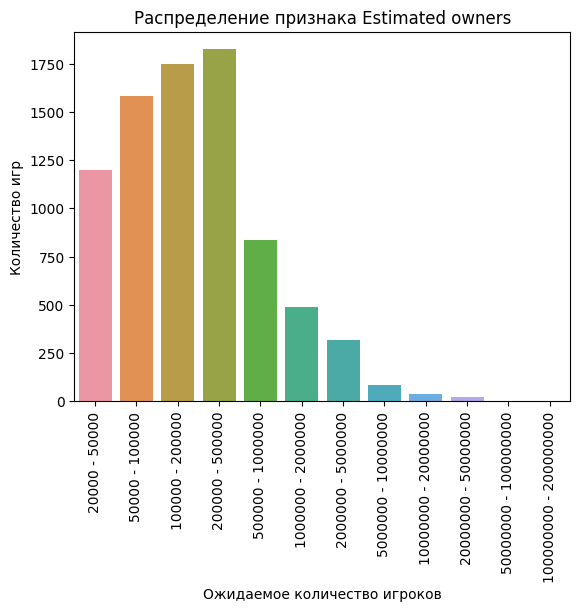

In [98]:
order=('20000 - 50000', '50000 - 100000', '100000 - 200000', '200000 - 500000', '500000 - 1000000',
       '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000',
       '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000',
       '100000000 - 200000000')

make_countplot('Estimated owners', df_popular, 'Ожидаемое количество игроков', order, rotation=True)

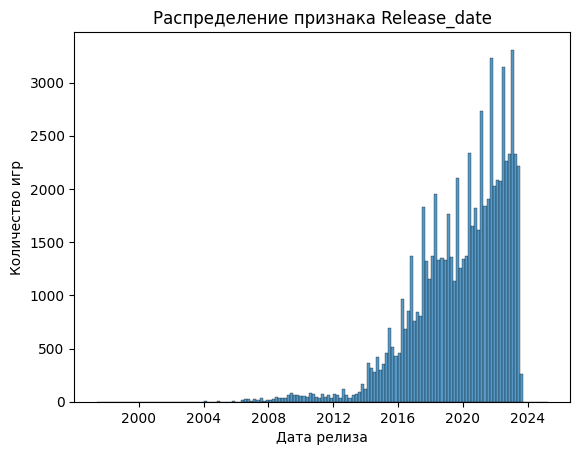

In [99]:
make_histplot('Release_date', df, 'Дата релиза')

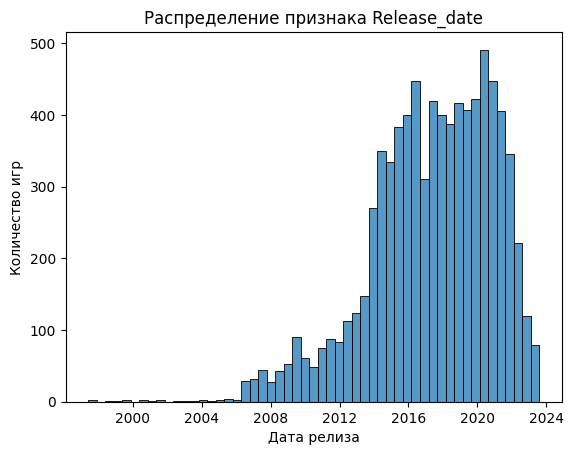

In [100]:
make_histplot('Release_date', df_popular, 'Дата релиза')

**Стало заметно меньше новых игр и больше старых**

In [101]:
df_price_pop = df_popular[df_popular['Price_Group'].isin(['Free', '< 5$', '< 10$', '< 15$', '< 20$',
                                     '< 25$', '< 30$', '< 35$', '< 40$'])]

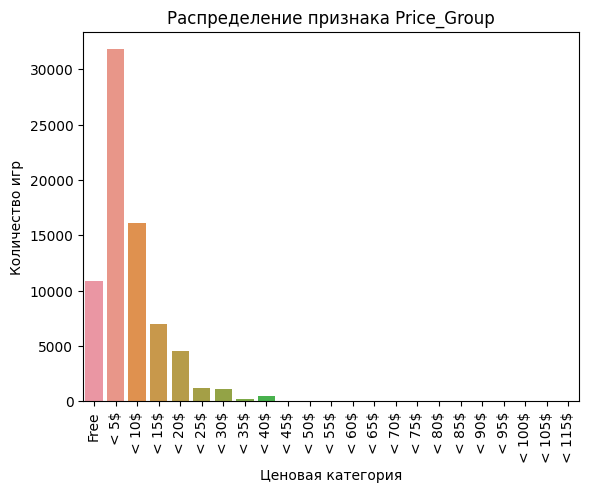

In [102]:
order = ('Free', '< 5$', '< 10$', '< 15$', '< 20$', '< 25$', '< 30$', '< 35$',
         '< 40$','< 45$', '< 50$', '< 55$', '< 60$',  '< 65$', '< 70$', '< 75$', '< 80$',
       '< 85$', '< 90$', '< 95$', '< 100$', '< 105$', '< 115$')

make_countplot('Price_Group', df_price, 'Ценовая категория', order, rotation=True)

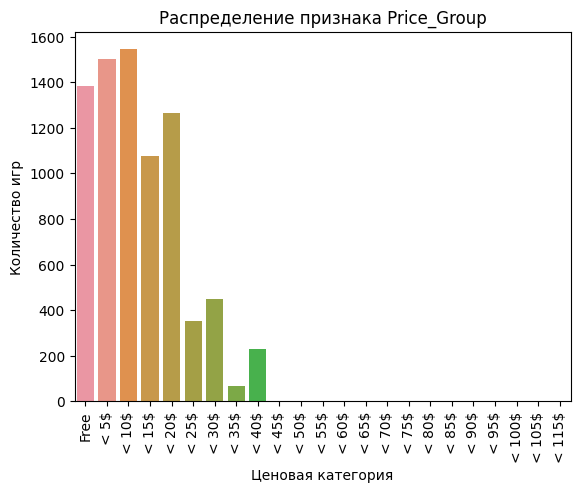

In [103]:
make_countplot('Price_Group', df_price_pop, 'Ценовая категория', order=order, rotation=True)

**Доля очень дешевых игр (< 5 USD) стала существенно меньше**

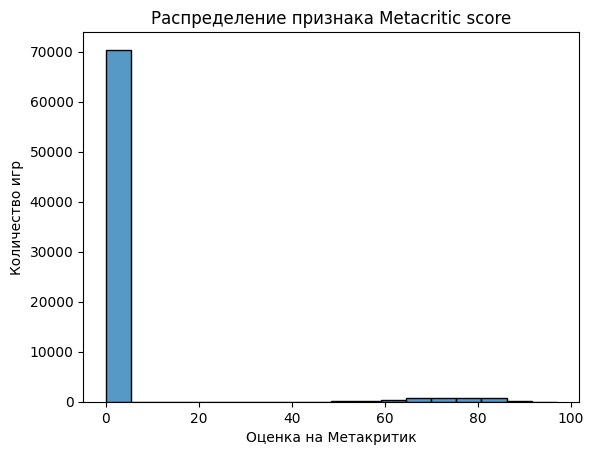

In [104]:
make_histplot('Metacritic score', df, 'Оценка на Метакритик')

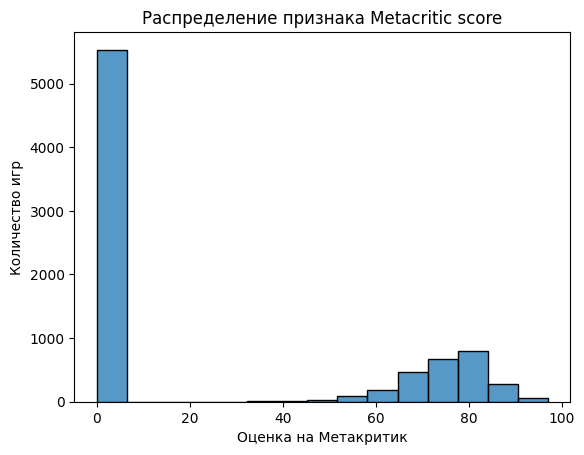

In [105]:
make_histplot('Metacritic score', df_popular, 'Оценка на Метакритик')

**Доля игр с оценкой на Metacritic существенно возросла**

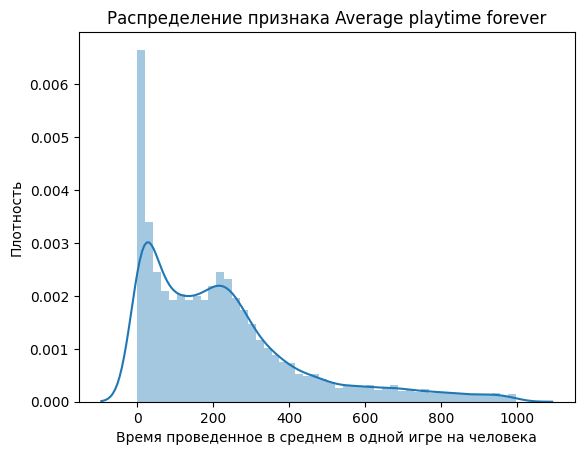

In [106]:
make_distplot('Average playtime forever', 
              df[(df['Average playtime forever'] != 0) & (df['Average playtime forever'] < 1000)], 
              'Время проведенное в среднем в одной игре на человека') 

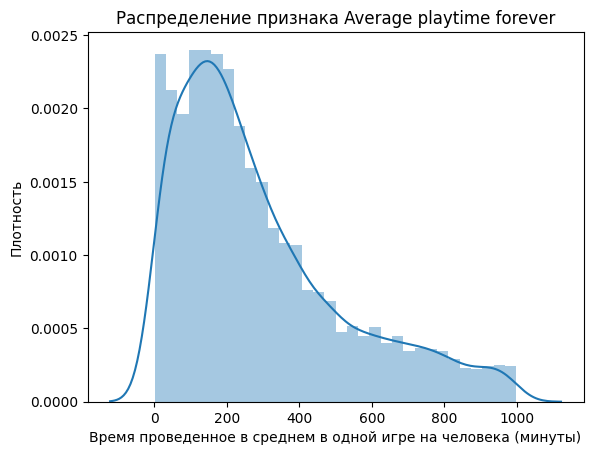

In [107]:
make_distplot('Average playtime forever', 
              df_popular[(df_popular['Average playtime forever'] != 0) & (df_popular['Average playtime forever'] < 1000)], 
              'Время проведенное в среднем в одной игре на человека (минуты)') 

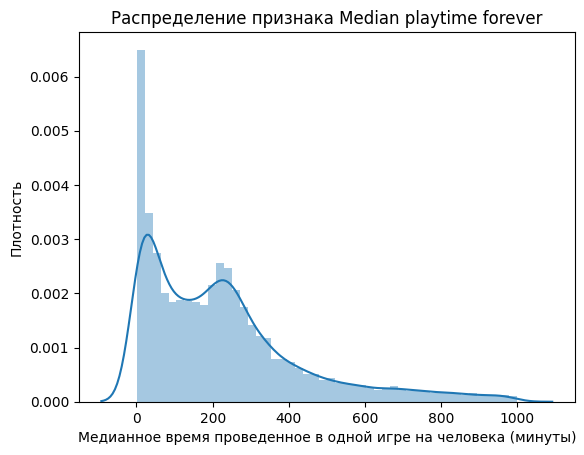

In [108]:
make_distplot('Median playtime forever', 
              df[(df['Median playtime forever'] != 0) & (df['Median playtime forever'] < 1000)], 
              'Медианное время проведенное в одной игре на человека (минуты)') 

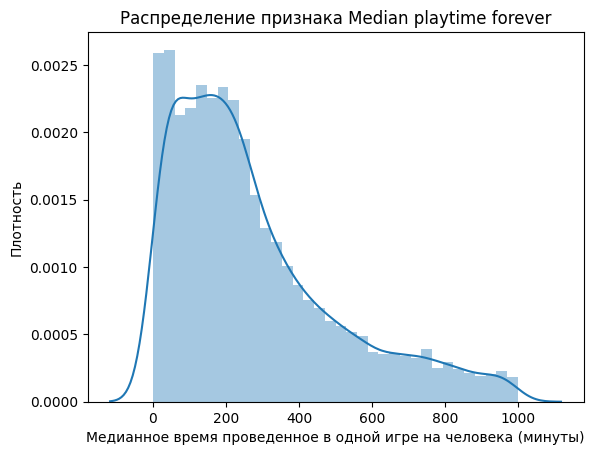

In [109]:
make_distplot('Median playtime forever', 
              df_popular[(df_popular['Median playtime forever'] != 0) & (df_popular['Median playtime forever'] < 1000)], 
              'Медианное время проведенное в одной игре на человека (минуты)') 

**Стало существенно меньше игр, в которых совсем не проводили время**

In [110]:
df_popular, sorted_tags_data = make_set('Tags', 'tags_set', df_popular)

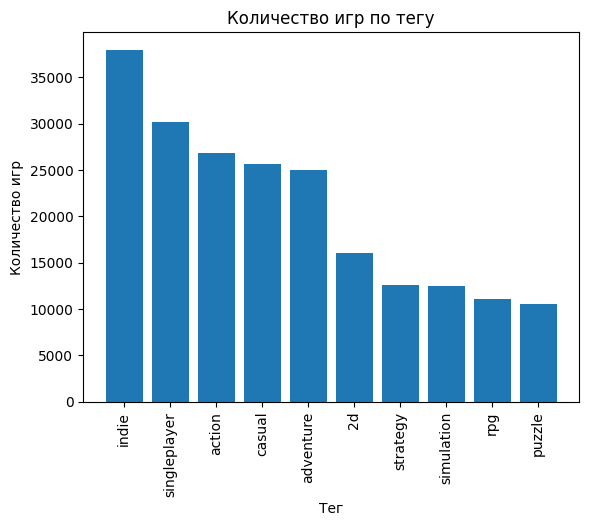

In [111]:
make_barplot('Tags', 'Count', sorted_tags_df, 
             'Тег', 'тегу', rotation=True)

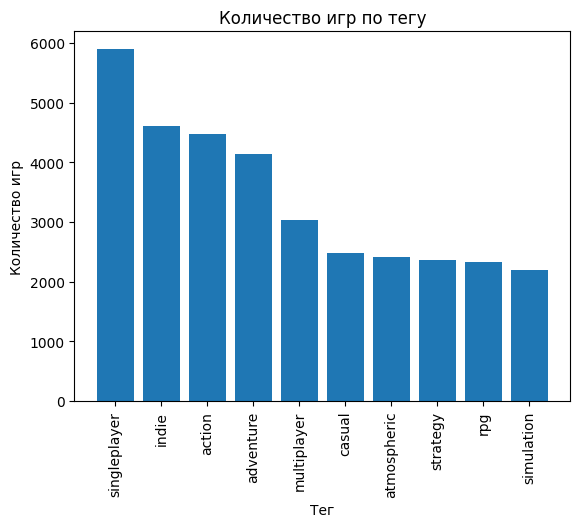

In [112]:
make_barplot('Tags', 'Count', sorted_tags_data, 
             'Тег', 'тегу', rotation=True)

**На первое место вышел тег singleplayer, обогнав инди**

In [113]:
df_popular, sorted_genres_data = make_set('Genres', 'genres_set', df_popular)

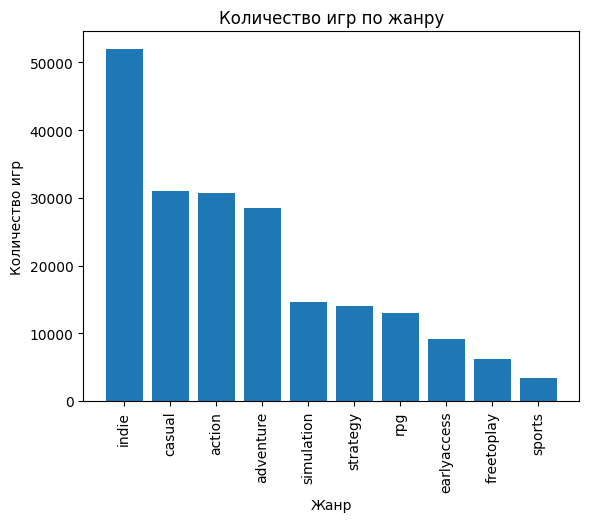

In [114]:
make_barplot('Genres', 'Count', sorted_genres_df, 
             'Жанр', 'жанру', rotation=True)

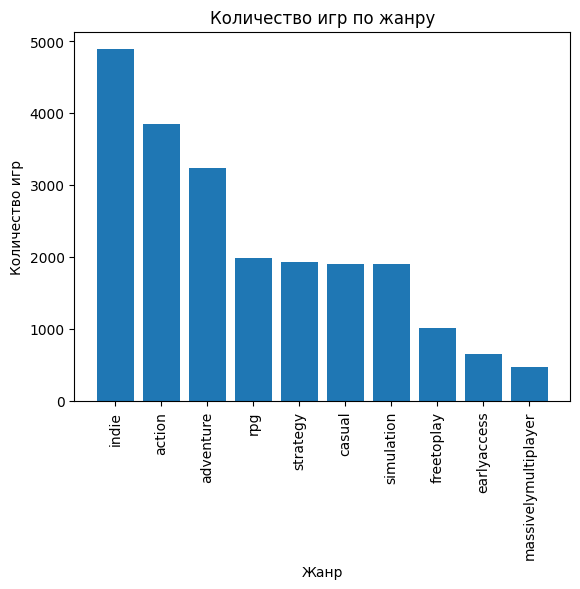

In [115]:
make_barplot('Genres', 'Count', sorted_genres_data, 
             'Жанр', 'жанру', rotation=True)

**Доля casual игр заметно уменьшилась**

# ВЫВОДЫ

1) Популярных игр в датасете около 8 тысяч, остальные игры "мусорные": по ним мало отзывов и для них ожидаемое количество игроков также маленькое 

2) Популярные игры демонстрируют отличные от всего набора игр тренды (для них выше цена, ожидаемое количество игрков, они более старые, в них доминирует не только жанр инди, но и экшен, также для них больше оценок пользоваталей и на метакритик)  

3) Для рекомендательной системы стоит использовать популярные игры и учтем их тренды для дальнейшей работы